Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.686 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.
[1/404] Guardado: lidar_0000.bin → 14198 puntos
[2/404] Guardado: lidar_0001.bin → 14259 puntos
[3/404] Guardado: lidar_0002.bin → 14229 puntos
[4/404] Guardado: lidar_0003.bin → 18522 puntos
[5/404] Guardado: lidar_0004.bin → 14223 puntos
[6/404] Guardado: lidar_0005.bin → 17866 puntos
[7/404] Guardado: lidar_0006.bin → 18749 puntos
[8/404] Guardado: lidar_0007.bin → 14113 puntos
[9/404] Guardado: lidar_0008.bin → 14212 puntos
[10/404] Guardado: lidar_0009.bin → 18775 puntos
[11/404] Guardado: lidar_0010.bin → 15547 puntos
[12/404] Guardado: lidar_0011.bin → 18970 puntos
[13/404] Guardado: lidar_0012.bin → 19033 puntos
[14/404] Guardado: lidar_0013.bin → 19134 puntos


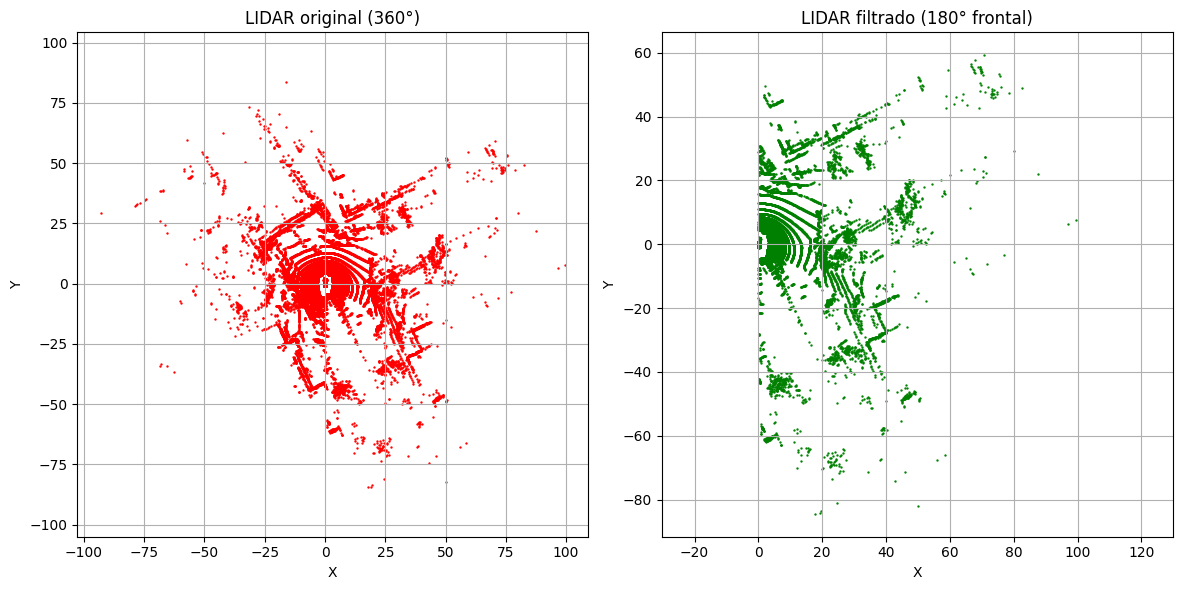

In [1]:
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import LidarPointCloud
import numpy as np
import os
import matplotlib.pyplot as plt


# Ruta al dataset original y a dónde guardar los nuevos archivos .bin
DATASET_PATH = "C:/Users/usuario/Desktop/CAF/v1.0-mini_canbus-001/v1.0-mini"
SAVE_PATH = "C:/Users/usuario/Desktop/CAF/lidar_filtrado_180"
os.makedirs(SAVE_PATH, exist_ok=True)

# Cargar el dataset
nusc = NuScenes(version='v1.0-mini', dataroot=DATASET_PATH, verbose=True)

# Procesar todos los samples
for i, sample in enumerate(nusc.sample):
    lidar_token = sample['data']['LIDAR_TOP']
    lidar_data = nusc.get('sample_data', lidar_token)
    lidar_path = os.path.join(nusc.dataroot, lidar_data['filename'])

    # Cargar nube de puntos LIDAR
    pc = LidarPointCloud.from_file(lidar_path)
    points = pc.points  # (4, N): x, y, z, reflectivity

    # Calcular ángulo horizontal
    x = points[0, :]
    y = points[1, :]
    angles = np.arctan2(y, x)

    # Crear máscara para campo frontal (-90° a +90°)
    mask = (angles > -np.pi / 2) & (angles < np.pi / 2)
    filtered_points = points[:, mask]

    # Guardar puntos filtrados en nuevo archivo .bin
    save_filename = f"lidar_{i:04d}.bin"
    save_path = os.path.join(SAVE_PATH, save_filename)
    filtered_points.T.astype(np.float32).tofile(save_path)

    print(f"[{i+1}/{len(nusc.sample)}] Guardado: {save_filename} → {filtered_points.shape[1]} puntos")

# Visualizar comparación
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original 360°
axes[0].scatter(points[0, :], points[1, :], s=0.5, c='red')
axes[0].set_title("LIDAR original (360°)")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].axis("equal")
axes[0].grid(True)

# Filtrado 180°
axes[1].scatter(filtered_points[0, :], filtered_points[1, :], s=0.5, c='green')
axes[1].set_title("LIDAR filtrado (180° frontal)")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].axis("equal")
axes[1].grid(True)

plt.tight_layout()
plt.show()